In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import sklearn.model_selection as train_test_split
import sklearn.linear_model as LinearRegression
import sklearn.preprocessing as LabelEncoder

c:\Users\kimka\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("realtor-data.csv")

df.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [3]:
df.shape

(1048575, 10)

In [4]:
print(df.duplicated().sum())

926465


#### Statictical Analysis before cleaning

Before addressing missing values, it's crucial to conduct a comprehensive analysis of the dataset to track any statistical changes. By examining the data prior to any modifications, we can gain insights into its initial distribution, trends, and characteristics.

This pre-analysis phase will help establish a baseline understanding of the dataset, enabling us to make informed decisions when handling missing values and performing subsequent analyses.

In [5]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,904735.000000,925066.000000,729378.000000,1.048367e+06,7.064910e+05,1.048503e+06
mean,3.327341,2.503352,15.593482,7.017637e+03,2.154038e+03,9.036547e+05
std,2.086783,1.956613,910.810132,3.807651e+03,3.002978e+03,2.849184e+06
min,1.000000,1.000000,0.000000,6.010000e+02,1.000000e+02,0.000000e+00
25%,2.000000,1.000000,0.110000,3.585000e+03,1.114000e+03,2.750000e+05
50%,3.000000,2.000000,0.280000,7.103000e+03,1.650000e+03,4.950000e+05
75%,4.000000,3.000000,1.110000,1.002800e+04,2.500000e+03,8.500000e+05
max,123.000000,198.000000,100000.000000,9.999900e+04,1.450112e+06,8.750000e+08


#### Regression Model and Duplicate Data

While duplicates in a regression model can potentially skew the final interpretation by introducing bias, it's crucial to contextualize these duplicates within the data source. In this specific case, duplicate entries might not necessarily indicate redundant data; rather, they likely reflect the fluctuating nature of the housing market.

Deleting these duplicates could inadvertently remove valuable insights into the dynamics of house prices. Therefore, it may be more beneficial to retain these duplicates in our dataset to ensure a comprehensive analysis of the housing market trends.


In [6]:
print(df.isnull().sum())

status                 0
bed               143840
bath              123509
acre_lot          319197
city                  77
state                  0
zip_code             208
house_size        342084
prev_sold_date    517985
price                 72
dtype: int64


#### Handling Missing Values in the Dataset

It's evident from the dataset that there are numerous missing values across various categories. While the absence of beds in some estates might be expected due to single-room housing, missing values for city, zip code, price and bathrooms are critical omissions. 

Given the size of the dataset, I've opted to exclude rows containing missing values for city, zip code, prices and bathrooms, as this information is essential for our analysis.

For other unspecified values, such as beds, we'll replace them with 0. This ensures consistency in the dataset while acknowledging the absence of specific information.

It's important to note that the "Previously Sold Date" column will not be utilized for analysis in this study. While this information may be relevant in other contexts, it is not pertinent to the specific objectives of our analysis.

In [7]:
# Drop missing values under the bath, city, zip-code, and price columns
df = df.dropna(subset=['bath', 'city', 'zip_code', 'price'])

# Drop "prev_sold_date" column
df = df.drop(columns=['prev_sold_date'])

# Fill the other missing values with 0 values
df = df.fillna(0)

In [8]:
df.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,0.0,65000.0


In [9]:
df.isnull().sum()

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

In [10]:
df.shape

(924929, 9)

# Visualisation

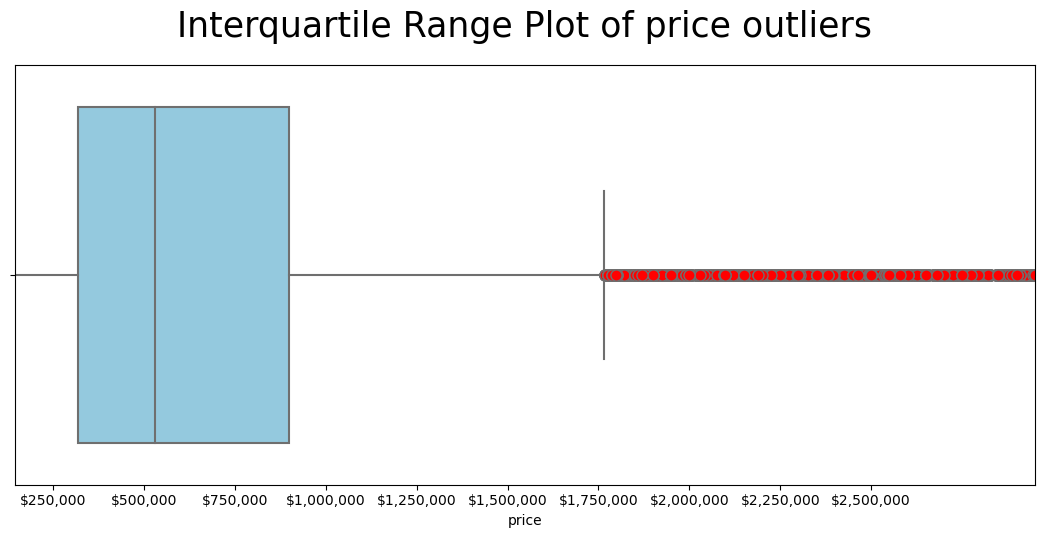

In [11]:
#Create boxplot
plt.figure(figsize=(17,7
                    ))

x_min = df['price'].quantile(.05)
x_max = df['price'].quantile(.95)

ax = sns.boxplot(data=df, x='price', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('price')
plt.ylabel('')
plt.title('Interquartile Range Plot of price outliers', fontsize=25, pad=20)

plt.xlim(x_min, x_max)

xtick_values = [250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2250000, 2500000]  # Adjust as needed
ax.set_xticks(xtick_values)
ax.set_xticklabels(['$250,000', '$500,000', '$750,000', '$1,000,000', '$1,250,000', '$1,500,000', '$1,750,000', '$2,000,000', '$2,250,000', '$2,500,000'])  # Adjust labels as needed


plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # Adjust margins as desired

After adjusting the graph's options, it's evident that there is a wide price range for the houses listed in our dataset. The graph illustrates a diverse range of house prices, spanning from $300,000 to $1.75 million, with an average house price approximately around $500,000.

The presence of numerous red dots on the plot indicates the existence of outliers within our dataset. These outliers represent exceptionally high-priced houses, contributing to the diversity of the housing market. The visualization highlights the presence of luxurious properties among the dataset.

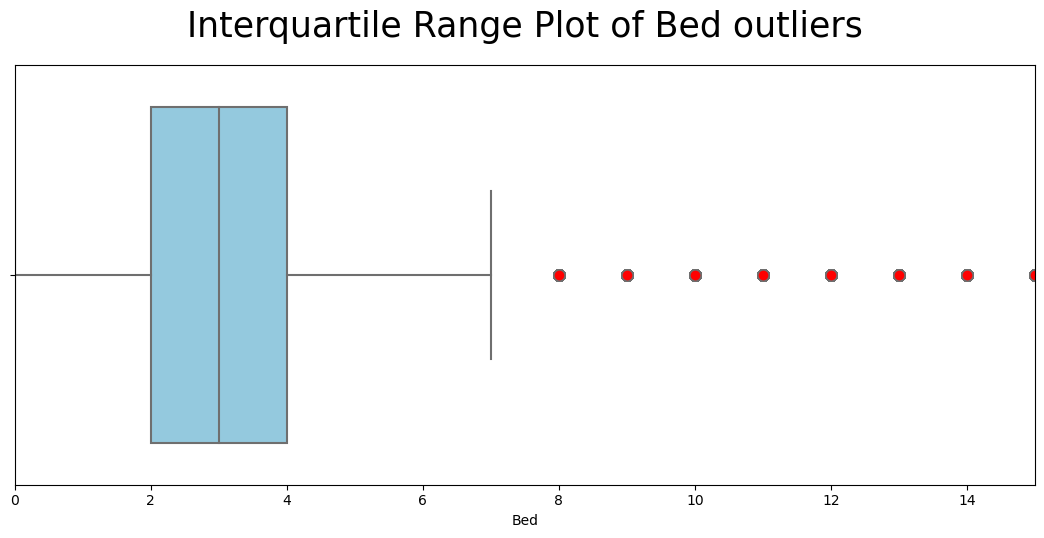

In [12]:
plt.figure(figsize=(17, 7))

sns.boxplot(data=df, x='bed', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('Bed')
plt.ylabel('')
plt.title('Interquartile Range Plot of Bed outliers', fontsize=25, pad=20)

plt.xlim(0, 15)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)


Similar to the price variable, the number of bedrooms exhibits a significant number of outliers in the dataset. These outliers typically correspond to the most luxurious houses, characterized by exceptionally high bedroom counts, such as 8 to 20+ bedrooms per house.

It's noteworthy that some houses in the dataset don't contain any bedrooms, which could represent unique property types or data anomalies.

On average, houses in the dataset have 3 bedrooms. However, it's considered normal for houses to have up to 7 bedrooms, indicating a diverse range of property sizes and types within the dataset.

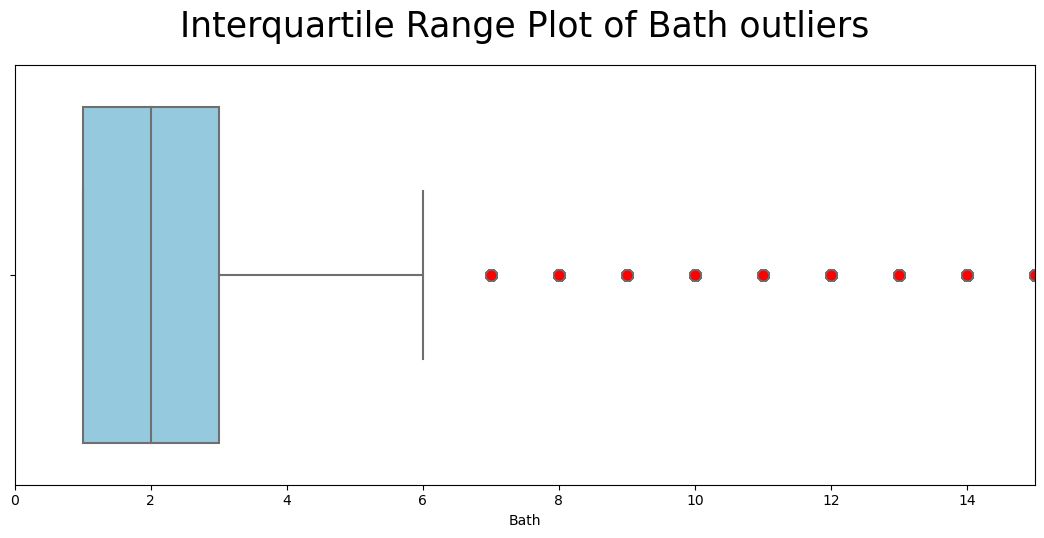

In [13]:
plt.figure(figsize=(17, 7))

sns.boxplot(data=df, x='bath', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('Bath')
plt.ylabel('')
plt.title('Interquartile Range Plot of Bath outliers', fontsize=25, pad=20)

plt.xlim(0, 15)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)


Similar to the number of bedrooms, the number of bathrooms in houses also exhibits a pattern of outliers. These outliers often indicate luxurious properties with exceptionally high bathroom counts, ranging from 7 to 20+ bathrooms per house. Additionally, there are instances where houses have no bathrooms, which could be outliers or data anomalies.

On average, houses in the dataset have approximately 2 bathrooms. However, it's noteworthy that the upper range of bathroom counts typically does not exceed 6 bathrooms per house, suggesting a general trend in housing construction or property types represented in the dataset.

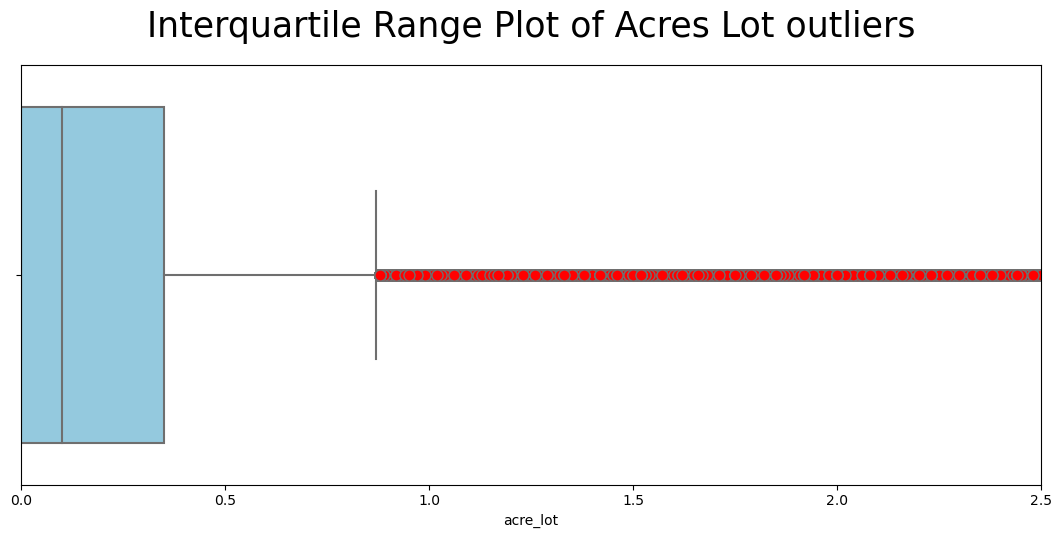

In [14]:
plt.figure(figsize=(17, 7))

sns.boxplot(data=df, x='acre_lot', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('acre_lot')
plt.ylabel('')
plt.title('Interquartile Range Plot of Acres Lot outliers', fontsize=25, pad=20)

plt.xlim(0, 2.5)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

The number of acres in lot sizes exhibits a similar outlier pattern to house prices, with numerous outliers beginning at acreage sizes of 0.8 and above. These outliers likely represent properties with large land holdings or estates.

The range of acreage lot sizes spans from 0 to 3 acres, with an average lot size of approximately 0.175 acres. This suggests a diverse range of property sizes within the dataset, from small lots to larger parcels of land.

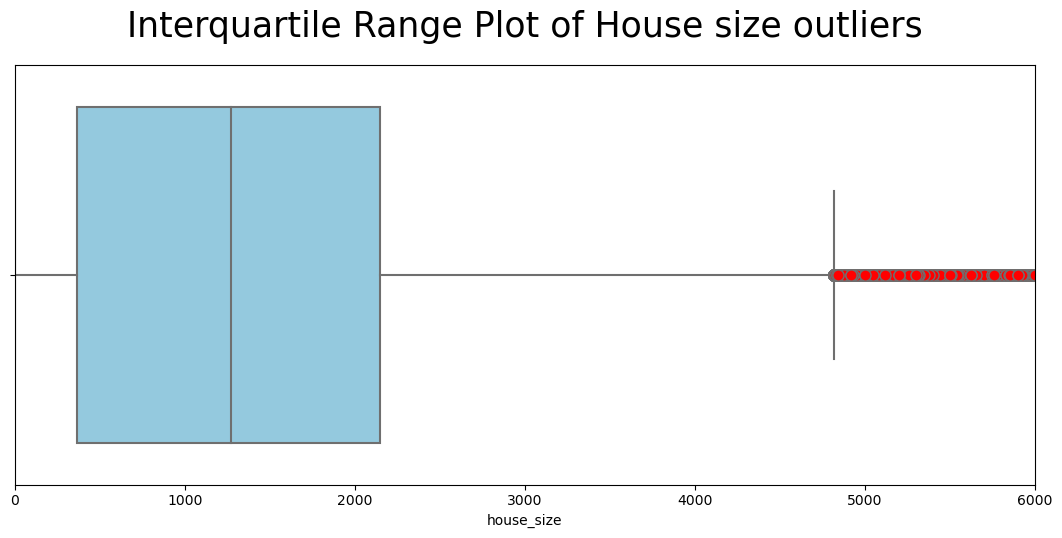

In [15]:
plt.figure(figsize=(17, 7))

sns.boxplot(data=df, x='house_size', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('house_size')
plt.ylabel('')
plt.title('Interquartile Range Plot of House size outliers', fontsize=25, pad=20)

plt.xlim(0, 6000)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

The box plot above illustrates the distribution of house sizes in square feet within the dataset. The regular range of house sizes spans from 0 to 2,100 square feet, with an upper interquartile range extending just slightly below 5,000 square feet. 

On average, houses in the dataset have an approximate size of 1,250 square feet. However, similar to previous variables analyzed, the house size variable also includes a considerable number of outliers. These outliers likely represent properties with exceptionally large or small footprints compared to the majority of houses in the dataset.

After examining the outliers present in our dataset, it's evident that there are numerous luxurious properties that fall outside the average range. To ensure the robustness of our model analysis, we will focus specifically on "normal" average houses and exclude any outliers representing luxurious or exceptionally large properties.

By narrowing our focus to average houses, we aim to create a more representative model that accurately captures the trends and patterns present in the majority of the housing market.

In [16]:
# Determine thresholds for outlier detection
thresholds = {
    'bed' : {'lower_bound' : 1, 'upper_bound': 7}, 
    'bath' : {'lower_bound' : 1, 'upper_bound': 6},
    'acre_lot' : {'lower_bound' : 0, 'upper_bound': 0.75},
    'house_size' : {'lower_bound' : 0, 'upper_bound': 5000},
    'price' : {'lower_bound' : 0, 'upper_bound': 1250000}
    }

# Filter out outliers

df_filtered = df.copy()

for variable, bound in thresholds.items():
    lower_bound = bound['lower_bound']
    upper_bound = bound['upper_bound']
    df_filtered = df_filtered[(df_filtered[variable] >= lower_bound) & (df_filtered[variable] <= upper_bound)]



In this project, I've chosen to start with boxplots as a means of initially cleaning up present outliers in the dataset. This approach allows us to identify and address outliers effectively before proceeding with additional data exploration using further visualizations.

By prioritizing the removal of outliers through boxplots, we aim to reduce noise in the dataset, enabling more accurate and insightful analysis in subsequent stages of the project.

In [17]:
#New df summary
df_filtered.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,614674.000000,614674.000000,614674.000000,614674.000000,614674.000000,6.146740e+05
mean,2.906313,2.063905,0.134212,7273.311210,1137.460584,4.931167e+05
std,1.335268,0.944599,0.169512,3856.589238,950.836398,2.750147e+05
min,1.000000,1.000000,0.000000,601.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,0.000000,3874.000000,0.000000,2.790000e+05
50%,3.000000,2.000000,0.070000,7419.000000,1100.000000,4.399000e+05
75%,4.000000,3.000000,0.210000,10305.000000,1714.000000,6.750000e+05
max,7.000000,6.000000,0.750000,95000.000000,5000.000000,1.250000e+06


In [18]:
#Set the display format for float values
df_filtered['price'] = df_filtered['price'].astype(int)

df_filtered['price']

0           105000
1            80000
2            67000
3           145000
4            65000
            ...   
1048566     988000
1048568     799000
1048570    1175000
1048572     925000
1048574     849000
Name: price, Length: 614674, dtype: int32

In [19]:
df_filtered.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,0.0,65000


Text(0, 0.5, 'Count')

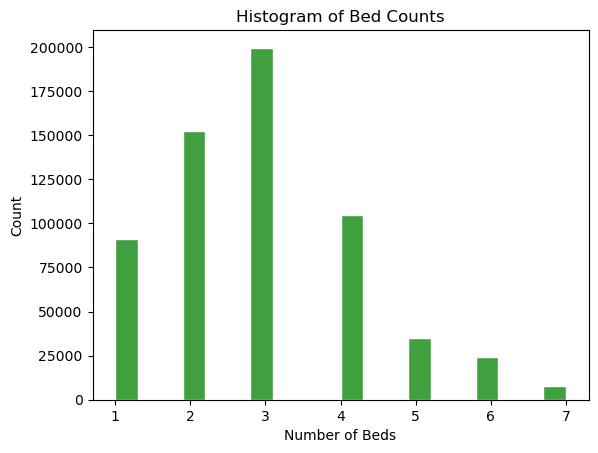

In [20]:
#Histogram of Bed count distribution
#Creat Hist
sns.histplot(df_filtered['bed'], bins=20, color='green', edgecolor='white')

#Set title and lebels
plt.title('Histogram of Bed Counts')
plt.xlabel('Number of Beds')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

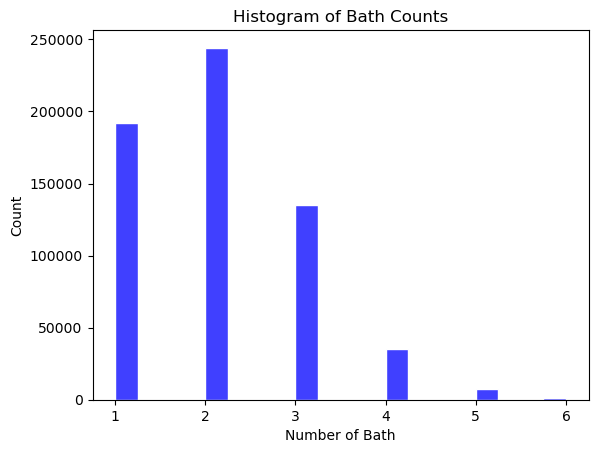

In [21]:
#Histogram of Bath count distribution
#Creat Hist
sns.histplot(df_filtered['bath'], bins=20, color='blue', edgecolor='white')

#Set title and labels
plt.title('Histogram of Bath Counts')
plt.xlabel('Number of Bath')
plt.ylabel('Count')

In [22]:
#Create a sample for the scatterplot
sample_size = 1000

#Create sample DF
sample_df = df_filtered.sample(n=sample_size, replace = True)

#Optionally, reset the index
sample_df.reset_index(drop=True, inplace=True)

([<matplotlib.axis.YTick at 0x1f181467430>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

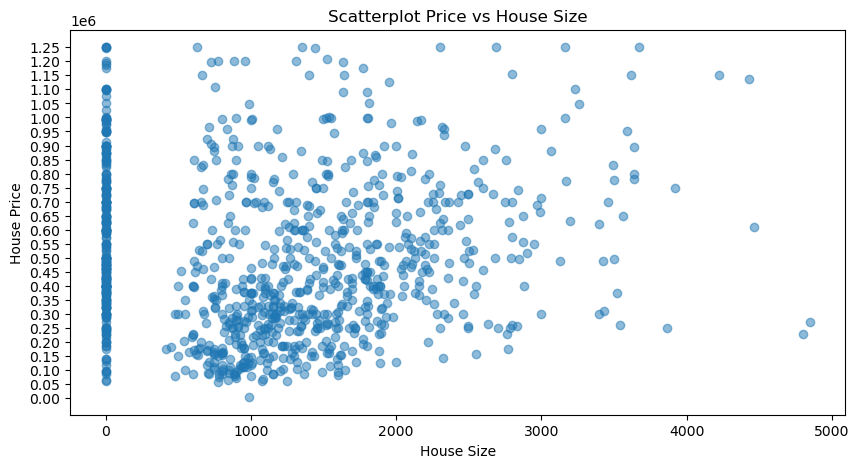

In [23]:
plt.figure(figsize=(10, 5))

#Create a scatter plot
plt.scatter(sample_df['house_size'], sample_df['price'], alpha=0.5)

#Set title and labels
plt.title('Scatterplot Price vs House Size')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.yticks(range(0, int(max(sample_df['price']))+1, 50000))

In [24]:
#List average House price per satete
average_house_price = df_filtered.groupby('state')['price'].mean().reset_index()
average_house_price

,state,price
0,Connecticut,306503.904018
1,Delaware,306523.018201
2,Georgia,507191.250000
3,Maine,333021.012746
4,Massachusetts,577833.469416
5,New Hampshire,412953.368957
6,New Jersey,464567.672325
7,New York,624247.952232
8,Pennsylvania,328872.218786
9,Puerto Rico,215765.214601


In [25]:
#List average House size per satete
average_house_size = df.groupby('state')['house_size'].mean().reset_index()
average_house_size

,state,house_size
0,Connecticut,2150.588681
1,Delaware,1900.458249
2,Georgia,3388.500000
3,Maine,2144.177770
4,Massachusetts,2260.770577
5,New Hampshire,2230.718223
6,New Jersey,1030.523568
7,New York,1300.774864
8,Pennsylvania,1747.768934
9,Puerto Rico,1880.483752


In [26]:
#List average House size per satete
average_house_bed = df.groupby('state')['bed'].mean().reset_index()
average_house_bed

,state,bed
0,Connecticut,3.524437
1,Delaware,3.187626
2,Georgia,5.000000
3,Maine,3.483931
4,Massachusetts,3.498036
5,New Hampshire,3.117165
6,New Jersey,3.435096
7,New York,2.767597
8,Pennsylvania,3.148982
9,Puerto Rico,3.592884


In [27]:
#List average House size per satete
average_house_bath = df.groupby('state')['bath'].mean().reset_index()
average_house_bath

,state,bath
0,Connecticut,2.655506
1,Delaware,2.343058
2,Georgia,3.500000
3,Maine,2.343023
4,Massachusetts,2.683854
5,New Hampshire,2.502738
6,New Jersey,2.608382
7,New York,2.321282
8,Pennsylvania,2.234994
9,Puerto Rico,2.293122


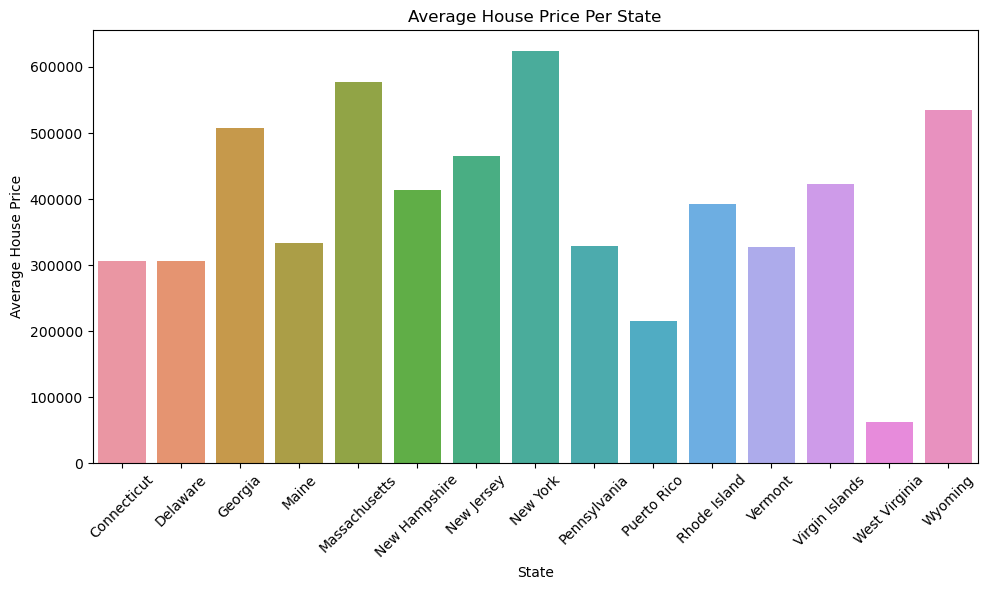

In [28]:
#Math Plotting the average house price per State
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='price', data=average_house_price)
plt.xlabel('State')
plt.ylabel('Average House Price')
plt.title('Average House Price Per State')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
#Create our model
#label_encoder = LabelEncoder()

#Convert 'state' to numerical using Label Encoding
#df['state_encoded'] = label_encoder.fit_transform(df)

#Convert 'city' to numerical using Label Encoding




In [ ]:
#Multi Linear Regression model

In [ ]:
#Look at results &  Interpret

In [ ]:
#Check results

#Conclusion